# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes

## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()

Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## Task 2: Visualize the Dataset

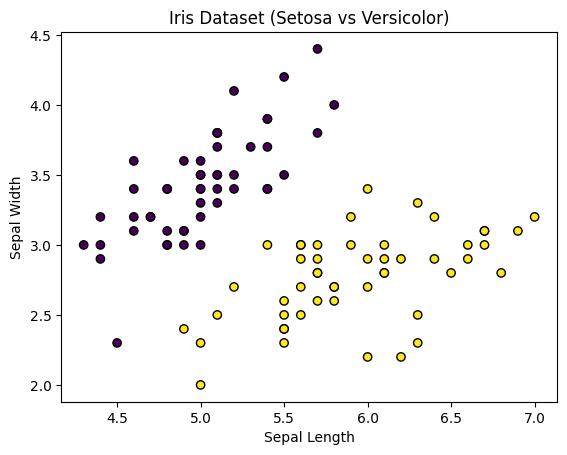

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()

## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) Split the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [6]:
# 2) Fit a KNN model with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# 3) Make predictions on test data
y_pred = knn.predict(X_test)

In [8]:
# 4) Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for k = 3:", accuracy)

Accuracy for k = 3: 1.0


## Task 4: Predictions for Different Values of k


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Different k values to test
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    print(f"\nResults for k = {k}")
    print("-" * 30)
    
    # Create and train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Show first 10 predictions vs actual
    print("First 10 Predictions: ", y_pred[:10])
    print("First 10 Actual:      ", y_test[:10])



Results for k = 1
------------------------------
Accuracy: 1.0
First 10 Predictions:  [1 1 1 0 0 0 0 1 0 0]
First 10 Actual:       [1 1 1 0 0 0 0 1 0 0]

Results for k = 3
------------------------------
Accuracy: 1.0
First 10 Predictions:  [1 1 1 0 0 0 0 1 0 0]
First 10 Actual:       [1 1 1 0 0 0 0 1 0 0]

Results for k = 5
------------------------------
Accuracy: 1.0
First 10 Predictions:  [1 1 1 0 0 0 0 1 0 0]
First 10 Actual:       [1 1 1 0 0 0 0 1 0 0]

Results for k = 7
------------------------------
Accuracy: 1.0
First 10 Predictions:  [1 1 1 0 0 0 0 1 0 0]
First 10 Actual:       [1 1 1 0 0 0 0 1 0 0]

Results for k = 9
------------------------------
Accuracy: 1.0
First 10 Predictions:  [1 1 1 0 0 0 0 1 0 0]
First 10 Actual:       [1 1 1 0 0 0 0 1 0 0]


k = 1, Accuracy = 1.0000
k = 2, Accuracy = 1.0000
k = 3, Accuracy = 1.0000
k = 4, Accuracy = 1.0000
k = 5, Accuracy = 1.0000
k = 6, Accuracy = 1.0000
k = 7, Accuracy = 1.0000
k = 8, Accuracy = 1.0000
k = 9, Accuracy = 1.0000
k = 10, Accuracy = 1.0000
k = 11, Accuracy = 1.0000
k = 12, Accuracy = 1.0000
k = 13, Accuracy = 1.0000
k = 14, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 16, Accuracy = 1.0000
k = 17, Accuracy = 1.0000
k = 18, Accuracy = 1.0000
k = 19, Accuracy = 1.0000
k = 20, Accuracy = 1.0000


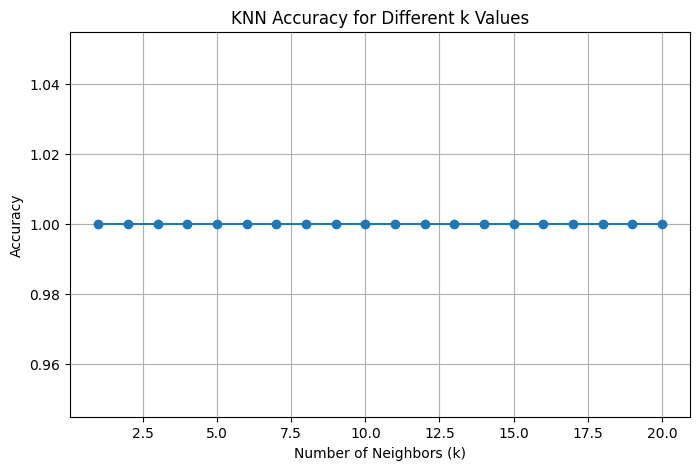

Best k value: 1
Best accuracy: 1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Try different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Print accuracies for each k
for k, acc in zip(k_values, accuracies):
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plot k vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k value:", best_k)
print("Best accuracy:", max(accuracies))


## Task 5: Decision Boundary Function (Provided)

In [11]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()

## Task 6: Decision Boundary for Different Values of k

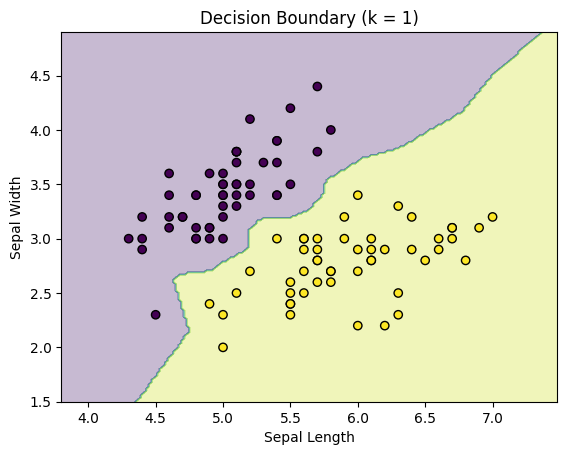

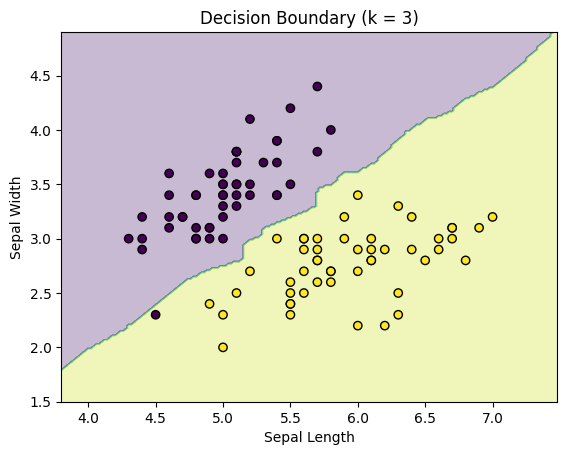

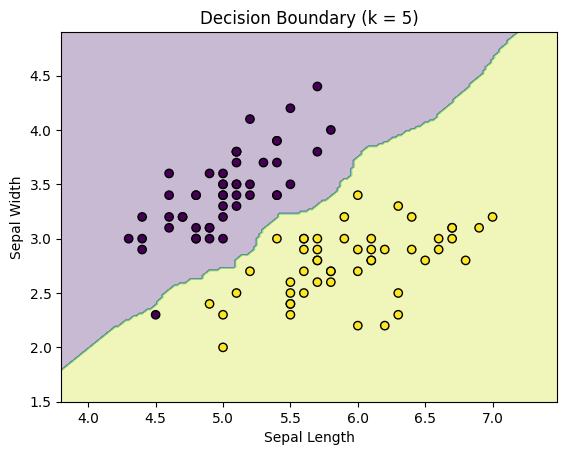

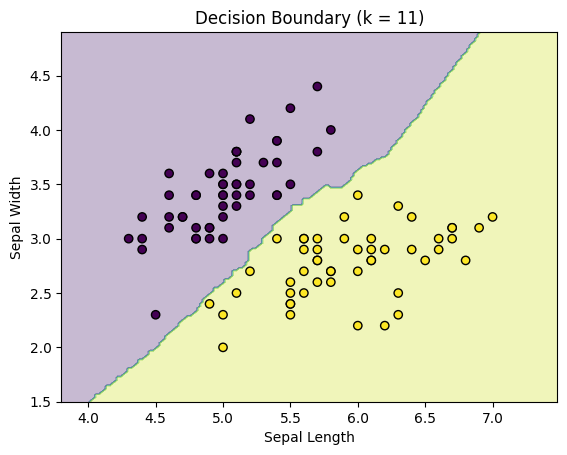

In [12]:
for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")


## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


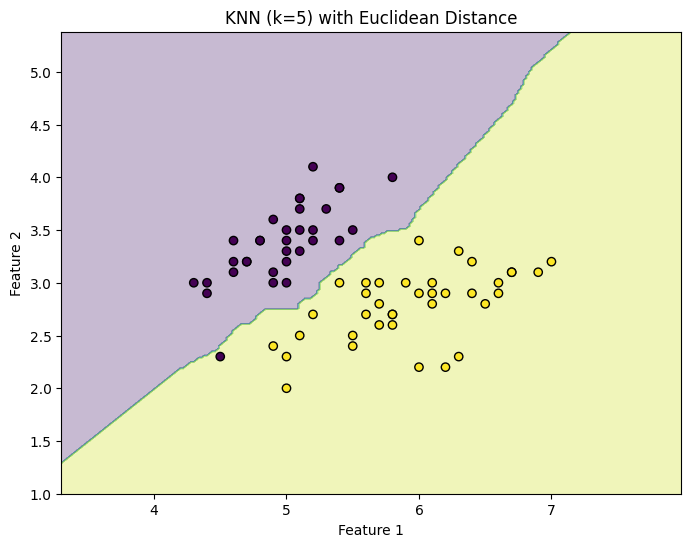

KNN (k=5) with Euclidean Distance Accuracy: 1.0000


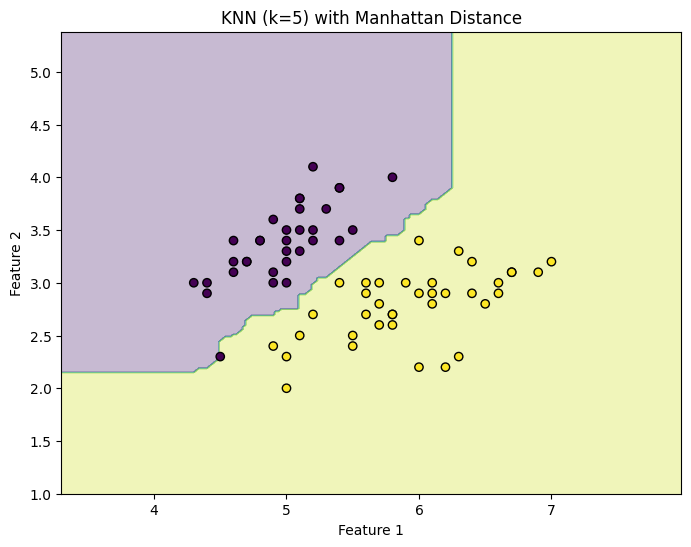

KNN (k=5) with Manhattan Distance Accuracy: 1.0000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use only first two features for plotting
X_vis = X[:, :2]

# Split again for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

# Create a mesh grid for decision boundary
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Function to plot decision boundary
def plot_boundary(metric, title):
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_vis, y_train_vis)
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()
    
    # Accuracy
    y_pred = knn.predict(X_test_vis)
    acc = accuracy_score(y_test_vis, y_pred)
    print(f"{title} Accuracy: {acc:.4f}")

# Plot for Euclidean distance
plot_boundary(metric='euclidean', title='KNN (k=5) with Euclidean Distance')

# Plot for Manhattan distance
plot_boundary(metric='manhattan', title='KNN (k=5) with Manhattan Distance')


## Task 8: Observations (Answer in Markdown)

## Task 8: Observations

### 1. How do predictions change as *k* increases?

As the value of *k* increases, the predictions become more stable and smoother.  
For small values of *k*, the classifier is highly sensitive to individual data points and noise.  
For larger values of *k*, predictions are based on more neighbors, so the model becomes less sensitive to noise but may lose some local detail.

---

### 2. Which *k* value gives the most complex decision boundary?

The most complex decision boundary is obtained when **k = 1**.  
With *k = 1*, the classifier assigns the class of the nearest single point, resulting in a highly irregular and jagged boundary that closely follows the training data.

---

### 3. Why does *k = 1* behave differently?

For **k = 1**, each test point is classified based on only one nearest neighbor.  
This makes the model extremely sensitive to noise and outliers, leading to **overfitting**.  
Small changes in the data can cause large changes in the decision boundary.

---

### 4. How does distance metric affect results?

The distance metric determines how similarity between points is measured.

- **Euclidean distance** works well when features are continuous and scaled similarly.  
- **Manhattan distance** may produce slightly different neighbor relationships, especially when features differ in scale or distribution.

As a result, the decision boundaries and accuracy can change slightly depending on the chosen metric.

---

### 5. Which configuration would you choose and why?

A good choice is **k = 5 with Euclidean distance**.

- It provides a good balance between bias and variance.  
- The decision boundary is smooth but still captures class structure.  
- It avoids overfitting (like k = 1) and underfitting (very large k).

Therefore, **k = 5 with Euclidean distance** is a stable and reliable configuration for this dataset.
